In [1]:
import pandas as pd # We know this one...
import requests # This is usefull with the API
import numpy as np # For performing numerical analysis
import matplotlib.pyplot as plt # Plotting
import weightedcalcs as wc # This allows for "weighted" calculations

In [2]:
BEA_ID = "6BF79D8C-8042-4196-88DC-0E0C55B0C3B6" # This is my Key

my_key = "https://APPS.BEA.gov/api/data?&UserID=" + BEA_ID 

data_set =  "&method=GetData&" + "datasetname=RegionalIncome&" # This access the Regional Income dataset

table_and_line_income = "TableName=CA30&LineCode=110&" # This grabs the income data

table_and_line_population = "TableName=CA1&LineCode=2&" # This grabs the populaiton data

year = "Year=" + "2010,2016" + "&" # Makes the years

location = "GeoFips=COUNTY&" # This is the location. I'm going to do this at the county level.

form = "ResultFormat=JSON" # The format.

In [6]:
API_URL = my_key + data_set + table_and_line_income + year + location + form

r = requests.get(API_URL)

df_income = pd.DataFrame(r.json()["BEAAPI"]["Results"]["Data"])

In [9]:
API_URL

'https://APPS.BEA.gov/api/data?&UserID=6BF79D8C-8042-4196-88DC-0E0C55B0C3B6&method=GetData&datasetname=RegionalIncome&TableName=CA30&LineCode=110&Year=2010,2016&GeoFips=COUNTY&ResultFormat=JSON'

In [12]:
df_income.tail(16)

,CL_UNIT,Code,DataValue,GeoFips,GeoName,NoteRef,TimePeriod,UNIT_MULT
6380,Dollars,CA30-110,"52,152",91000,New England,NaN,2010,0
6381,Dollars,CA30-110,"62,033",91000,New England,NaN,2016,0
6382,Dollars,CA30-110,"47,795",92000,Mideast,NaN,2010,0
6383,Dollars,CA30-110,"58,342",92000,Mideast,NaN,2016,0
6384,Dollars,CA30-110,"37,977",93000,Great Lakes,NaN,2010,0
6385,Dollars,CA30-110,"47,140",93000,Great Lakes,NaN,2016,0
6386,Dollars,CA30-110,"39,586",94000,Plains,NaN,2010,0
6387,Dollars,CA30-110,"47,990",94000,Plains,NaN,2016,0
6388,Dollars,CA30-110,"36,475",95000,Southeast,NaN,2010,0
6389,Dollars,CA30-110,"43,723",95000,Southeast,NaN,2016,0


In [18]:
df_income["income"] = df_income["DataValue"].str.replace(",","")

#test_string.replace(",","")

df_income["income"] = df_income["income"].replace("(NA)", np.nan)

df_income["income"] = df_income["income"].astype("float")

In [19]:
df_income.head()

,CL_UNIT,Code,DataValue,GeoFips,GeoName,NoteRef,TimePeriod,UNIT_MULT,income
0,Dollars,CA30-110,"40,545",00000,United States,NaN,2010,0,40545.0
1,Dollars,CA30-110,"49,831",00000,United States,NaN,2016,0,49831.0
2,Dollars,CA30-110,"33,844",01000,Alabama,NaN,2010,0,33844.0
3,Dollars,CA30-110,"39,294",01000,Alabama,NaN,2016,0,39294.0
4,Dollars,CA30-110,"33,415",01001,"Autauga, AL",NaN,2010,0,33415.0


In [21]:
grp = df_income.groupby("GeoFips")

In [23]:
grp.get_group("01000")

,CL_UNIT,Code,DataValue,GeoFips,GeoName,NoteRef,TimePeriod,UNIT_MULT,income
2,Dollars,CA30-110,"33,844",01000,Alabama,NaN,2010,0,33844.0
3,Dollars,CA30-110,"39,294",01000,Alabama,NaN,2016,0,39294.0


In [27]:
def income_growth(df):
    
    new_df = pd.DataFrame([])
    
    new_df["income"] = 100*(np.log(df.income).diff() / 6)
    
    new_df["time"] = df.TimePeriod
    
    new_df["GeoName"] = df.GeoName
    
    return new_df

In [28]:
df_growth = grp.apply(income_growth)

In [30]:
df_growth.head(10)

income  time        GeoName
GeoFips                                 
00000   0       NaN  2010  United States
        1  3.437080  2016  United States
01000   2       NaN  2010        Alabama
        3  2.488502  2016        Alabama
01001   4       NaN  2010    Autauga, AL
        5  2.792060  2016    Autauga, AL
01003   6       NaN  2010    Baldwin, AL
        7  2.832856  2016    Baldwin, AL
01005   8       NaN  2010    Barbour, AL
        9  2.193907  2016    Barbour, AL

In [31]:
df_growth.dropna(inplace = True)

df_growth.head()

,,income,time,GeoName
GeoFips,,,,
00000,1,3.437080,2016,United States
01000,3,2.488502,2016,Alabama
01001,5,2.792060,2016,"Autauga, AL"
01003,7,2.832856,2016,"Baldwin, AL"
01005,9,2.193907,2016,"Barbour, AL"


In [32]:
df_growth.reset_index(inplace = True)

In [33]:
df_growth.head()

,GeoFips,level_1,income,time,GeoName
0,00000,1,3.437080,2016,United States
1,01000,3,2.488502,2016,Alabama
2,01001,5,2.792060,2016,"Autauga, AL"
3,01003,7,2.832856,2016,"Baldwin, AL"
4,01005,9,2.193907,2016,"Barbour, AL"


In [13]:
url = "https://raw.githubusercontent.com/mwaugh0328/"
url = url + "Did-China-Cause-Trump/master/us-election-2016-results-by-county.csv"

election_2016 = pd.read_csv(url)

election_2016.head(10)

,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,AK,alaska,2000,Alaska,246588,GOP,Trump,130415.0
1,AL,alabama,1087,Macon,8748,GOP,Trump,1394.0
2,AL,alabama,1131,Wilcox,6095,GOP,Trump,1737.0
3,AL,alabama,1037,Coosa,5223,GOP,Trump,3376.0
4,AL,alabama,1009,Blount,25384,GOP,Trump,22808.0
5,AL,alabama,1133,Winston,10255,GOP,Trump,9225.0
6,AL,alabama,1123,Tallapoosa,18504,GOP,Trump,12967.0
7,AL,alabama,1053,Escambia,15213,GOP,Trump,10282.0
8,AL,alabama,1057,Fayette,8196,GOP,Trump,6705.0
9,AL,alabama,1049,DeKalb,26086,GOP,Trump,21779.0


In [14]:
election_2016["Candidate"].unique()

array(['Trump', 'Clinton', 'Stein', 'Johnson', 'Castle'], dtype=object)

In [15]:
election_2016.dtypes

StateCode           object
StateName           object
CountyFips           int64
CountyName          object
CountyTotalVote      int64
Party               object
Candidate           object
VoteCount          float64
dtype: object

In [35]:
df_growth["GeoFips"] = df_growth["GeoFips"].astype(int)

In [36]:
df_growth.dtypes

GeoFips      int32
level_1      int64
income     float64
time        object
GeoName     object
dtype: object

In [37]:
bea_election = pd.merge(df_growth, election_2016, how='inner',
                         left_on = "GeoFips", right_on = "CountyFips", indicator = True)

In [38]:
bea_election.head()

,GeoFips,level_1,income,time,GeoName,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge
0,1001,5,2.79206,2016,"Autauga, AL",AL,alabama,1001,Autauga,24661,GOP,Trump,18110.0,both
1,1001,5,2.79206,2016,"Autauga, AL",AL,alabama,1001,Autauga,24661,DEM,Clinton,5908.0,both
2,1001,5,2.79206,2016,"Autauga, AL",AL,alabama,1001,Autauga,24661,GRN,Stein,105.0,both
3,1001,5,2.79206,2016,"Autauga, AL",AL,alabama,1001,Autauga,24661,LIB,Johnson,538.0,both
4,1001,5,2.79206,2016,"Autauga, AL",AL,alabama,1001,Autauga,24661,CST,Castle,NaN,both


In [39]:
trump_vote = election_2016[election_2016.Candidate == "Trump"].VoteCount.sum()
clinton_vote = election_2016[election_2016.Candidate == "Clinton"].VoteCount.sum()

print("Clinton Vote", clinton_vote, "Trump Vote", trump_vote)

Clinton Vote 59923033.0 Trump Vote 59692978.0


In [40]:
only_trump = bea_election[bea_election.Candidate == "Trump"]

In [41]:
only_trump.head()

,GeoFips,level_1,income,time,GeoName,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge
0,1001,5,2.792060,2016,"Autauga, AL",AL,alabama,1001,Autauga,24661,GOP,Trump,18110.0,both
5,1003,7,2.832856,2016,"Baldwin, AL",AL,alabama,1003,Baldwin,94090,GOP,Trump,72780.0,both
10,1005,9,2.193907,2016,"Barbour, AL",AL,alabama,1005,Barbour,10390,GOP,Trump,5431.0,both
15,1007,11,2.406787,2016,"Bibb, AL",AL,alabama,1007,Bibb,8748,GOP,Trump,6733.0,both
20,1009,13,2.507985,2016,"Blount, AL",AL,alabama,1009,Blount,25384,GOP,Trump,22808.0,both


In [42]:
only_trump["trump_share"] = only_trump["VoteCount"]/only_trump["CountyTotalVote"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
only_trump.head()

,GeoFips,level_1,income,time,GeoName,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge,trump_share
0,1001,5,2.792060,2016,"Autauga, AL",AL,alabama,1001,Autauga,24661,GOP,Trump,18110.0,both,0.734358
5,1003,7,2.832856,2016,"Baldwin, AL",AL,alabama,1003,Baldwin,94090,GOP,Trump,72780.0,both,0.773515
10,1005,9,2.193907,2016,"Barbour, AL",AL,alabama,1005,Barbour,10390,GOP,Trump,5431.0,both,0.522714
15,1007,11,2.406787,2016,"Bibb, AL",AL,alabama,1007,Bibb,8748,GOP,Trump,6733.0,both,0.769662
20,1009,13,2.507985,2016,"Blount, AL",AL,alabama,1009,Blount,25384,GOP,Trump,22808.0,both,0.898519


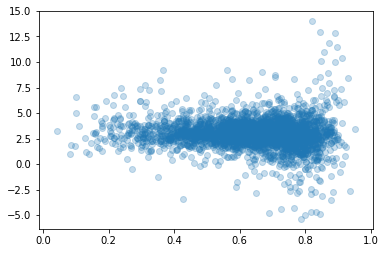

In [48]:
fig, ax = plt.subplots()

ax.scatter(only_trump.trump_share, only_trump.income, alpha = 0.25)

plt.show()

In [50]:
nquantiles = 10 # This is the number of quintiles, it just allows me to change this at will.

labels = ["quantile " + str(var) for var in range(1,nquantiles + 1)]

# Here I'm goint to use list comprehension to create some lables, like quantile 1, etc.

inc_q = pd.qcut(only_trump["income"], # this says take quantiles by income
                nquantiles,           # The number of quantiels
                labels = labels)      # The labels to go withit.

grouped = only_trump.groupby(inc_q)   # Then this is the magic, I can group by it...

vote_income_quant = 100*(grouped.VoteCount.sum() / grouped.CountyTotalVote.sum())

                                       # Then this says, given the group, some over all votes (for trump)
                                       # Then divide by all votes, in total, for that group

print(vote_income_quant)

income
quantile 1     58.912789
quantile 2     48.790985
quantile 3     49.987439
quantile 4     51.002848
quantile 5     49.387772
quantile 6     49.429775
quantile 7     51.126003
quantile 8     46.558740
quantile 9     44.495191
quantile 10    36.242813
dtype: float64
